In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar datasets
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

# Exploración inicial de los datos

In [2]:
print(df_companies.info())
print(df_companies.head())

print(df_neighborhoods.info())
print(df_neighborhoods.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
  dropoff_loca

# Limpieza y preparación de los datos

In [3]:
# Verificar valores nulos
print(df_companies.isna().sum())
print(df_neighborhoods.isna().sum())

# Verificar tipos de datos
print(df_companies.dtypes)
print(df_neighborhoods.dtypes)


company_name    0
trips_amount    0
dtype: int64
dropoff_location_name    0
average_trips            0
dtype: int64
company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object


## Comentario:

Hasta el momento se identifica que los tipos de datos son correctos y adecuados para su respectiva categoría. 

# Análisis de empresas de carros

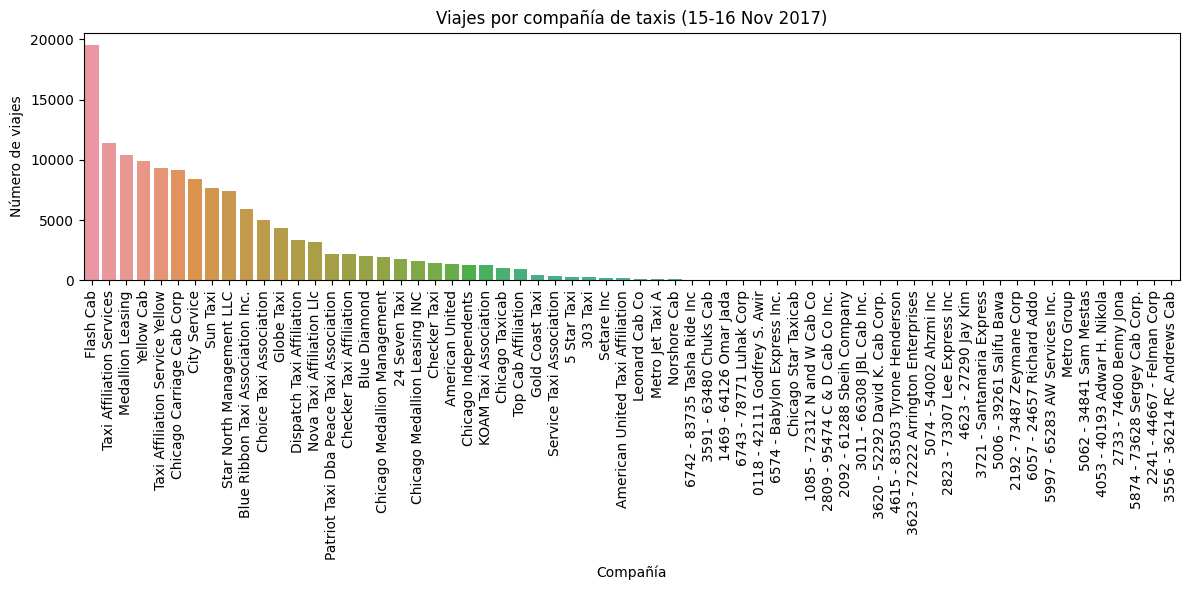

In [4]:
# Ordenar empresas por número de viajes
top_companies = df_companies.sort_values('trips_amount', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='company_name', y='trips_amount', data=top_companies)
plt.title('Viajes por compañía de taxis (15-16 Nov 2017)')
plt.xticks(rotation=90)
plt.ylabel('Número de viajes')
plt.xlabel('Compañía')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de mostrar el resultado, se puede observar la compañía que tiene más viajes agendados, buena manera de ordenar los nombres de las compañías, otra manera de motrar esta gráfica de una manera ordenada es limitando el número de compañías a mostrar, es decir, mostrar solo el top 15 por ejemplo
</div>

# Análisis de barrios

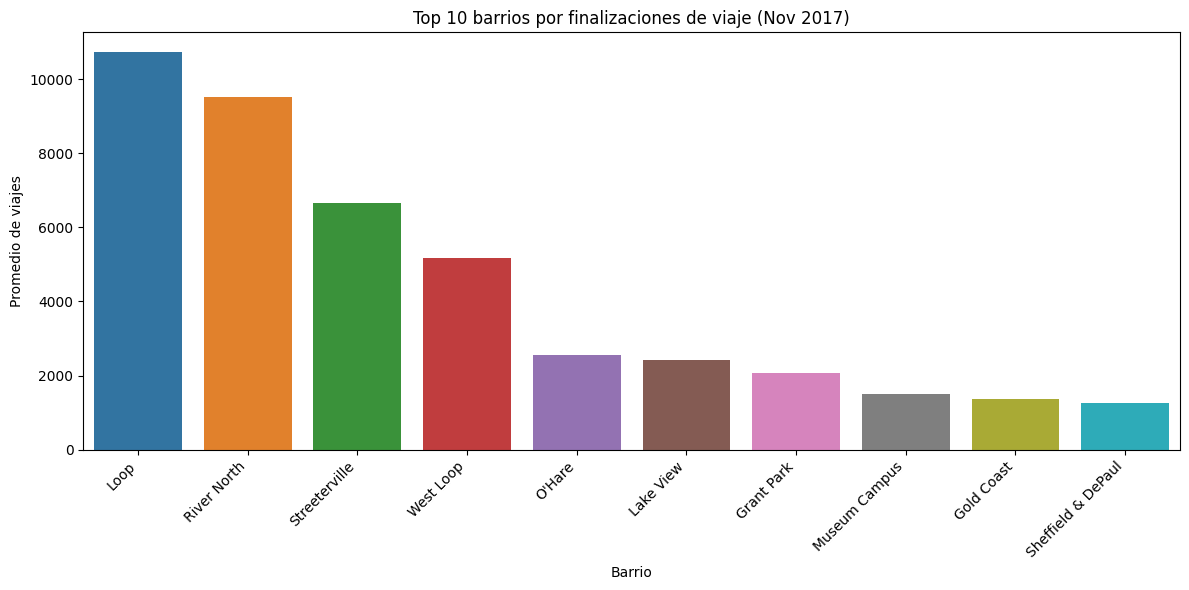

In [5]:
# Top 10 barrios
top_neighborhoods = df_neighborhoods.sort_values('average_trips', ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_neighborhoods)
plt.title('Top 10 barrios por finalizaciones de viaje (Nov 2017)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Promedio de viajes')
plt.xlabel('Barrio')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

## Conclusiones basadas en los gráficos

In [6]:
# Conclusiones empresas
print(f"Empresa líder: {top_companies.iloc[0]['company_name']} con {top_companies.iloc[0]['trips_amount']} viajes")

# Conclusiones barrios
print(f"Barrio más popular: {top_neighborhoods.iloc[0]['dropoff_location_name']} con promedio de {top_neighborhoods.iloc[0]['average_trips']:.1f} viajes")

Empresa líder: Flash Cab con 19558 viajes
Barrio más popular: Loop con promedio de 10727.5 viajes


Se logra identificar los 10 barrios principales barrios en términos de finalización de recorrido. A la luz de esto, se pueden implementar estrategias de indagación más específicas (si el stakeholder así lo requiere) para descubrir por qué es más probable que estos barrios sean los más exitosos en términos de finalización de recorridos.

Por otro lado, se evidencian una gran cantidad de empresas de taxis que tienen prácticamente una presencia nula durante Noviembre de 2017, mientras que un grupo pequeño de empresas acumularon la mayor parte de los recorridos. Flash Cab se destaca por duplicar en cantidad de recorridos a la que aparentemente es su principal competencia, Taxi Affiliation Services. ¿Quizá Flash Cab tiene mayor cantidad de vehículos disponibles, mejor estrategia de marketing o mejor afianciamiento en el mercado por alguna variable desconocida?

# Prueba de Hipótesis

**Hipótesis Nula:** "No hay diferencia en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare durante los sábados lluviosos". 

**Hipótesis Alternativa:** "Hay diferencia en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare durante los sábados lluviosos". 

Nivel de significancia estadística (α): 0.05

In [7]:
df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

# Convertir tipos
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])
df_trips['duration_seconds'] = df_trips['duration_seconds'].astype(float)

# Filtrar solo sábados
df_trips['day_of_week'] = df_trips['start_ts'].dt.dayofweek
saturday_trips = df_trips[df_trips['day_of_week'] == 5]  # 5 = sábado

# Crear grupos
rainy_saturdays = saturday_trips[saturday_trips['weather_conditions'] == 'Bad']
clear_saturdays = saturday_trips[saturday_trips['weather_conditions'] == 'Good']

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<b/>

La manera de separar la información de ambos días es correcta
</div>

In [8]:
from scipy import stats as st
#Prueba t de Student para muestras independientes
t_stat, p_value = st.ttest_ind(
    rainy_saturdays['duration_seconds'],
    clear_saturdays['duration_seconds'],
    equal_var=False
)

print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")


Estadístico t: 7.186
Valor p: 0.00000


In [9]:
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia de diferencia significativa")
    # Calcular diferencia promedio
    mean_diff = rainy_saturdays['duration_seconds'].mean() - clear_saturdays['duration_seconds'].mean()
    print(f"Diferencia promedio: {mean_diff/60:.1f} minutos")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia de diferencia significativa")

Rechazamos la hipótesis nula: hay evidencia de diferencia significativa
Diferencia promedio: 7.1 minutos


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones
</div>

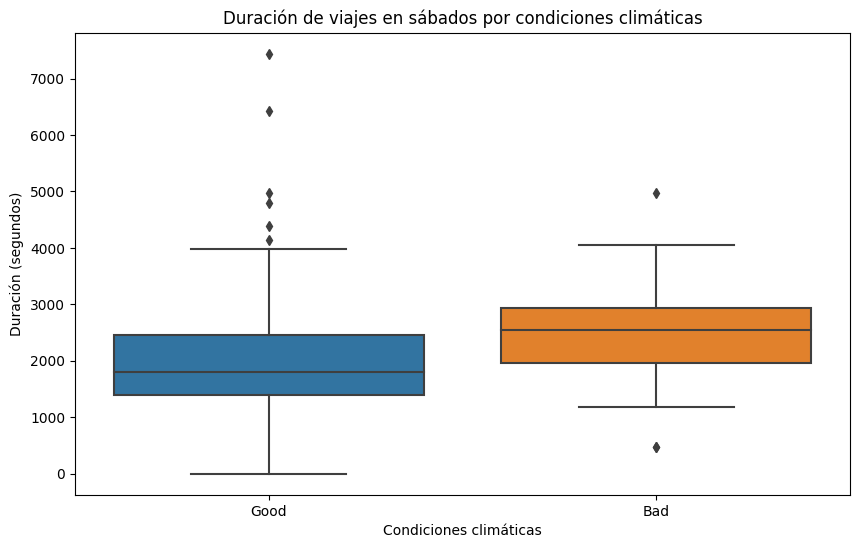

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=saturday_trips)
plt.title('Duración de viajes en sábados por condiciones climáticas')
plt.ylabel('Duración (segundos)')
plt.xlabel('Condiciones climáticas')
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Buena manera de mostrar las distribuciones de ambos tipos de día, podemos ver que hay una clara diferencia en sus distribuciones
</div>

# Conclusión General

Los datos revelan información relevante sobre el comportamiento de los viajes en taxi en Chicago durante noviembre de 2017. En primer lugar, el análisis exploratorio muestra un mercado dominado por Flash Cab, que realizó 19,558 viajes en los días 15 y 16 de noviembre, superando significativamente a su competidor más cercano, Taxi Affiliation Services, con 11,422 viajes. En cuanto a los destinos, el Loop emerge como el principal punto de llegada, con un promedio de 10,727 viajes, seguido de cerca por River North (9,524 viajes) y Streeterville (6,665 viajes).

La prueba de hipótesis sobre el impacto del clima en la duración de los viajes arrojó resultados concluyentes. Los viajes desde el Loop hasta el Aeropuerto O'Hare los sábados lluviosos demuestran:

* Un aumento estadísticamente significativo de 7.1 minutos en promedio (p < 0.00001)

* Una diferencia tan marcada que la probabilidad de que sea producto del azar es prácticamente nula

Esto equivale a un incremento aproximado del 15-20% en el tiempo de viaje respecto a días con buen tiempo.

Estos hallazgos sugieren que las condiciones meteorológicas adversas afectan sustancialmente la movilidad urbana, particularmente en rutas como la conexión entre el centro financiero y el aeropuerto principal. Las empresas de transporte podrían utilizar estos insights para optimizar sus operaciones durante condiciones climáticas adversas, mientras que los planificadores urbanos podrían considerar estas variaciones en el diseño de infraestructuras y sistemas de gestión de tráfico.

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    
Continúa con el excelente trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado y limpio
    
</div>

